In [1]:
# -----------------------------
#  Importation des librairies
# -----------------------------
import pandas as pd
import numpy as np

# -----------------------------
#  URL du fichier CSV sur GitHub (version RAW)
# -----------------------------
url = "https://raw.githubusercontent.com/Asmaehassi/PROJET-ML-HASSI-ASMAE/main/mental_health_diagnosis_treatment_.csv"

# -----------------------------
#  Chargement du dataset
# -----------------------------
df = pd.read_csv(url)

# -----------------------------
#  Vérifications de base
# -----------------------------
print("Dimensions du dataset :", df.shape)
print("\nAperçu des premières lignes :")
display(df.head())

print("\nInformations générales :")
print(df.info())

print("\nValeurs manquantes :")
print(df.isnull().sum())


Dimensions du dataset : (500, 17)

Aperçu des premières lignes :


,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63



Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient ID                    500 non-null    int64 
 1   Age                           500 non-null    int64 
 2   Gender                        500 non-null    object
 3   Diagnosis                     500 non-null    object
 4   Symptom Severity (1-10)       500 non-null    int64 
 5   Mood Score (1-10)             500 non-null    int64 
 6   Sleep Quality (1-10)          500 non-null    int64 
 7   Physical Activity (hrs/week)  500 non-null    int64 
 8   Medication                    500 non-null    object
 9   Therapy Type                  500 non-null    object
 10  Treatment Start Date          500 non-null    object
 11  Treatment Duration (weeks)    500 non-null    int64 
 12  Stress Level (1-10)           500 non-null    int64 

In [17]:
# Vérification des valeurs manquantes
print(df.isnull().sum())

# Suppression des doublons
df = df.drop_duplicates()

# Vérification des types
print(df.dtypes)


Age                             0
Gender                          0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
Adherence to Treatment (%)      0
dtype: int64
Age                              int64
Gender                          object
Symptom Severity (1-10)          int64
Mood Score (1-10)                int64
Sleep Quality (1-10)             int64
Physical Activity (hrs/week)     int64
Treatment Duration (weeks)       int64
Stress Level (1-10)              int64
Outcome                         object
Treatment Progress (1-10)        int64
Adherence to Treatment (%)       int64
dtype: object


In [5]:
# Liste des colonnes à supprimer
cols_to_drop = [
    "Patient ID",
    "Diagnosis",
    "Medication",
    "Therapy Type",
    "Treatment Start Date",
    "AI-Detected Emotional State"
]

# Supprimer les colonnes si elles existent dans la base
df = df.drop([col for col in cols_to_drop if col in df.columns], axis=1)

# Vérification
print("Colonnes restantes :", df.columns.tolist())
df.head()

Colonnes restantes : ['Age', 'Gender', 'Symptom Severity (1-10)', 'Mood Score (1-10)', 'Sleep Quality (1-10)', 'Physical Activity (hrs/week)', 'Treatment Duration (weeks)', 'Stress Level (1-10)', 'Outcome', 'Treatment Progress (1-10)', 'Adherence to Treatment (%)']


,Age,Gender,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),Adherence to Treatment (%)
0,43,Female,10,5,8,5,11,9,Deteriorated,7,66
1,40,Female,9,5,4,7,11,7,No Change,7,78
2,55,Female,6,3,4,3,14,7,Deteriorated,5,62
3,34,Female,6,3,6,5,8,8,Deteriorated,10,72
4,52,Male,7,6,6,8,12,5,Deteriorated,6,63


In [6]:
# Liste des colonnes features
feature_cols = [
    "Age",
    "Gender",
    "Symptom Severity (1-10)",
    "Mood Score (1-10)",
    "Sleep Quality (1-10)",
    "Physical Activity (hrs/week)",
    "Treatment Duration (weeks)",
    "Stress Level (1-10)",
    "Treatment Progress (1-10)",
    "Adherence to Treatment (%)"
]

# Sélection uniquement des colonnes existantes
feature_cols = [col for col in feature_cols if col in df.columns]

X = df[feature_cols]

# Target
y = df["Outcome"] if "Outcome" in df.columns else None

# Affichage
print("Colonnes utilisées pour X :", X.columns.tolist())
print("\nAperçu X :")
display(X.head())

print("\nAperçu Y :")
display(y.head())


Colonnes utilisées pour X : ['Age', 'Gender', 'Symptom Severity (1-10)', 'Mood Score (1-10)', 'Sleep Quality (1-10)', 'Physical Activity (hrs/week)', 'Treatment Duration (weeks)', 'Stress Level (1-10)', 'Treatment Progress (1-10)', 'Adherence to Treatment (%)']

Aperçu X :


,Age,Gender,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),Adherence to Treatment (%)
0,43,Female,10,5,8,5,11,9,7,66
1,40,Female,9,5,4,7,11,7,7,78
2,55,Female,6,3,4,3,14,7,5,62
3,34,Female,6,3,6,5,8,8,10,72
4,52,Male,7,6,6,8,12,5,6,63



Aperçu Y :


,Outcome
0,Deteriorated
1,No Change
2,Deteriorated
3,Deteriorated
4,Deteriorated


In [7]:
from sklearn.preprocessing import LabelEncoder

# -----------------------------
#  Encodage de la variable cible y
# -----------------------------
le_y = LabelEncoder()
y = le_y.fit_transform(df["Outcome"])

# -----------------------------
#  Encodage de la colonne Gender dans X
# -----------------------------
le_gender = LabelEncoder()
X["Gender"] = le_gender.fit_transform(X["Gender"])

# Vérification
print("y (encoded target) =", y[:10])
print("\nX.head() :")
X.head()
X.loc[:, "Gender"] = le_gender.fit_transform(X["Gender"])


y (encoded target) = [0 2 0 0 0 2 0 2 2 2]

X.head() :


/tmp/ipython-input-2676223103.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] = le_gender.fit_transform(X["Gender"])


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.head())


     Age  Gender  Symptom Severity (1-10)  Mood Score (1-10)  \
479   55       1                        6                  4   
113   20       0                        5                  8   
121   19       1                        8                  4   
295   26       1                        6                  4   
311   32       1                        9                  4   

     Sleep Quality (1-10)  Physical Activity (hrs/week)  \
479                     6                             2   
113                     4                             2   
121                     6                             3   
295                     7                             7   
311                     9                             7   

     Treatment Duration (weeks)  Stress Level (1-10)  \
479                          13                    6   
113                          10                    5   
121                          16                    7   
295                          16     

In [10]:
print(X_test.head())


     Age  Gender  Symptom Severity (1-10)  Mood Score (1-10)  \
89    22       0                        9                  7   
400   49       1                        6                  3   
380   27       0                        7                  6   
279   32       1                        6                  7   
416   35       0                       10                  5   

     Sleep Quality (1-10)  Physical Activity (hrs/week)  \
89                      7                             4   
400                     9                             2   
380                     8                             5   
279                     9                             2   
416                     4                             6   

     Treatment Duration (weeks)  Stress Level (1-10)  \
89                           16                    6   
400                          15                    8   
380                           8                    6   
279                           9     

In [11]:
from sklearn.preprocessing import StandardScaler

# Colonnes numériques à scaler
cols_to_scale = [
    "Age",
    "Symptom Severity (1-10)",
    "Mood Score (1-10)",
    "Sleep Quality (1-10)",
    "Physical Activity (hrs/week)",
    "Treatment Duration (weeks)",
    "Stress Level (1-10)",
    "Treatment Progress (1-10)",
    "Adherence to Treatment (%)"
]

# Initialiser le scaler
scaler = StandardScaler()

# Fit-transform sur le train
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

# Transform seulement sur le test
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


In [12]:
from xgboost import XGBClassifier

# Initialiser le modèle
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

# Entraîner
model.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [15]:
# Prédictions sur le test set
y_pred = model.predict(X_test)

from sklearn import metrics
print("Accuracy :", metrics.accuracy_score(Y_test, y_pred))


Accuracy : 0.34


In [16]:
#  Exemple d’entrée utilisateur (doit suivre l'ordre de X.columns)
custom_input = [[
    45,   # Age
    1,    # Gender (1 = male, 0 = female selon ton encoding)
    9,    # Symptom Severity
    3,    # Mood Score
    5,    # Sleep Quality
    8,    # Physical Activity
    10,   # Treatment Duration
    6,    # Stress Level
    5,    # Treatment Progress
    60    # Adherence %
]]

# Convertir en DataFrame avec les bons noms de colonnes
custom_df = pd.DataFrame(custom_input, columns=X.columns)

# Appliquer scaler sur les colonnes numériques
custom_df[cols_to_scale] = scaler.transform(custom_df[cols_to_scale])

# Prédiction
prediction = model.predict(custom_df)

print("Predicted class :", prediction[0])


Predicted class : 1


In [18]:
# Aperçu statistique des variables numériques
df.describe()


,Age,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),Adherence to Treatment (%)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,38.708000,7.478000,5.482000,6.472000,5.216000,12.110000,7.542000,7.436000,75.45400
std,12.712433,1.706265,1.707486,1.668167,2.829374,2.440864,1.709409,1.725067,9.08697
min,18.000000,5.000000,3.000000,4.000000,1.000000,8.000000,5.000000,5.000000,60.00000
25%,28.000000,6.000000,4.000000,5.000000,3.000000,10.000000,6.000000,6.000000,67.00000
50%,38.000000,8.000000,5.000000,6.000000,5.000000,12.000000,8.000000,7.000000,76.00000
75%,50.000000,9.000000,7.000000,8.000000,8.000000,14.000000,9.000000,9.000000,84.00000
max,60.000000,10.000000,8.000000,9.000000,10.000000,16.000000,10.000000,10.000000,90.00000


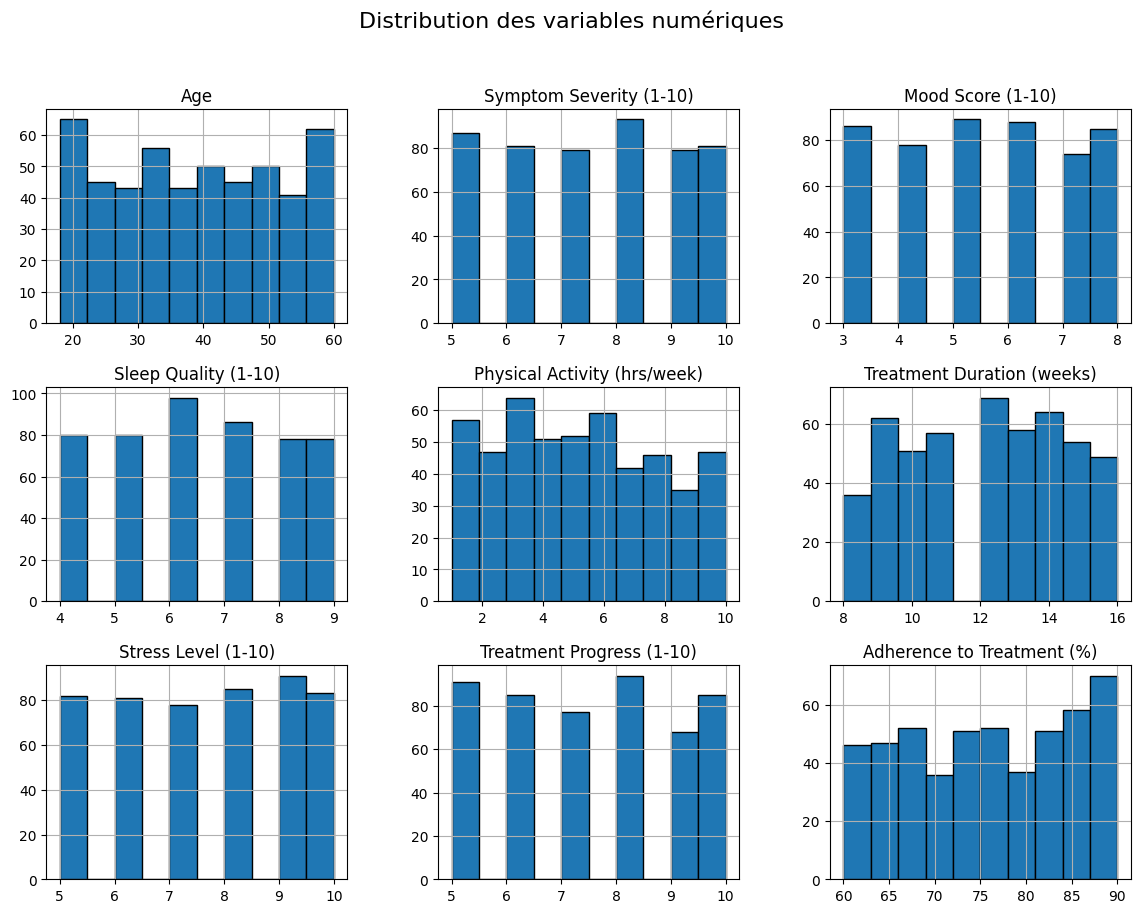

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(14, 10), edgecolor='black')
plt.suptitle("Distribution des variables numériques", fontsize=16)
plt.show()


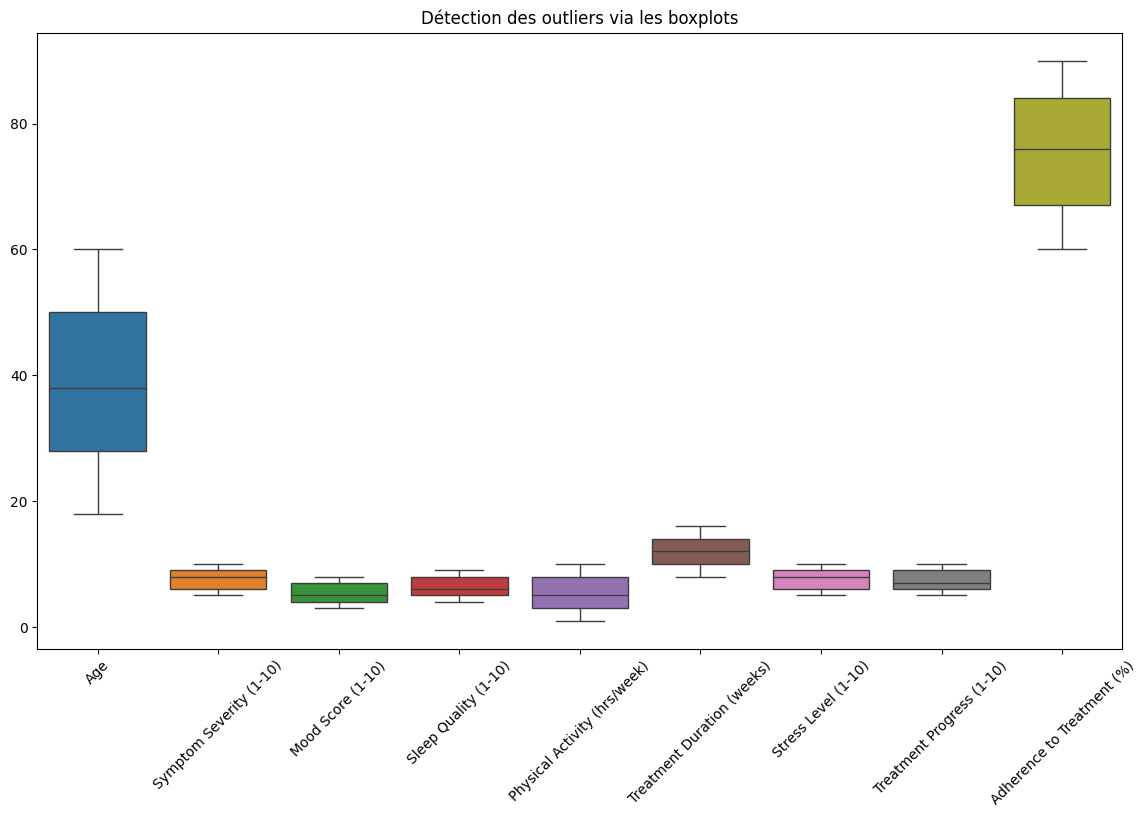

In [20]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=45)
plt.title("Détection des outliers via les boxplots")
plt.show()


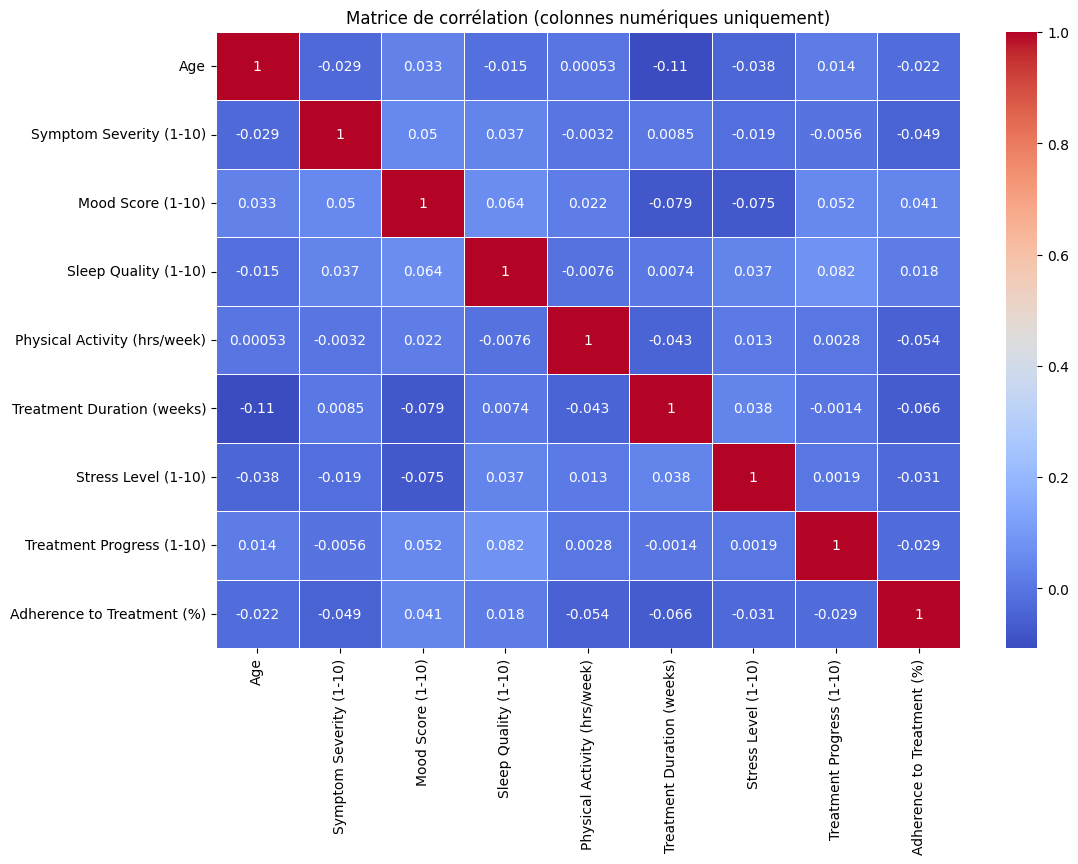

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes numériques uniquement
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation (colonnes numériques uniquement)")
plt.show()


In [32]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)


In [33]:
print("\nXGBoost accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nXGBoost classification report:\n", classification_report(y_test, y_pred_xgb))



XGBoost accuracy: 0.31

XGBoost classification report:
               precision    recall  f1-score   support

           0       0.25      0.29      0.27        34
           1       0.34      0.32      0.33        34
           2       0.36      0.31      0.33        32

    accuracy                           0.31       100
   macro avg       0.32      0.31      0.31       100
weighted avg       0.32      0.31      0.31       100



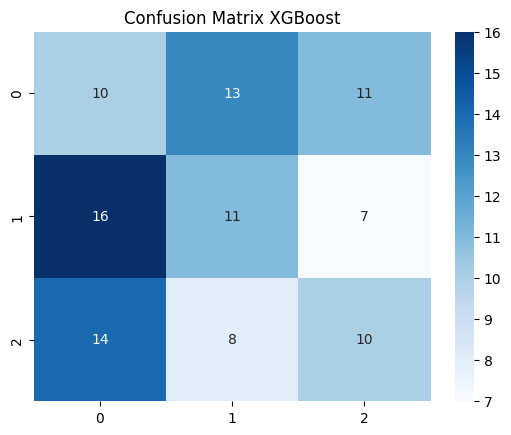

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix XGBoost")
plt.show()


In [36]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1]
}

grid = GridSearchCV(XGBClassifier(random_state=42), param_grid=params, scoring="accuracy", cv=3)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)


Best params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
Best CV score: 0.33000411476452324


In [24]:
from sklearn.model_selection import train_test_split

# Split des données (refaire proprement)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [26]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = [
    "Age",
    "Symptom Severity (1-10)",
    "Mood Score (1-10)",
    "Sleep Quality (1-10)",
    "Physical Activity (hrs/week)",
    "Treatment Duration (weeks)",
    "Stress Level (1-10)",
    "Treatment Progress (1-10)",
    "Adherence to Treatment (%)"
]

scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Accuracy Logistic Regression :", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Accuracy Logistic Regression : 0.35

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.41      0.40        34
           1       0.29      0.29      0.29        34
           2       0.37      0.34      0.35        32

    accuracy                           0.35       100
   macro avg       0.35      0.35      0.35       100
weighted avg       0.35      0.35      0.35       100



In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(" Random Forest Accuracy :", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


 Random Forest Accuracy : 0.4

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.50      0.44        34
           1       0.46      0.38      0.42        34
           2       0.36      0.31      0.33        32

    accuracy                           0.40       100
   macro avg       0.40      0.40      0.40       100
weighted avg       0.40      0.40      0.40       100



In [38]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0]
}

xgb = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print(" Best parameters found:", grid.best_params_)
print(" Best accuracy (CV):", grid.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
 Best parameters found: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
 Best accuracy (CV): 0.33000411476452324
